In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Load The Dataset**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/coffee_sales.csv')
data.shape

(1133, 6)

## **Data Inspection**

In [3]:
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [5]:
data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


## **Data Preprocessing**

In [6]:
# drop datetime column
data.drop(columns=['datetime'], inplace=True)
data.head()

,date,cash_type,card,money,coffee_name
0,2024-03-01,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,card,ANON-0000-0000-0004,38.7,Latte


In [7]:
# check for missing values
data.isnull().sum()

,0
date,0
cash_type,0
card,89
money,0
coffee_name,0


In [8]:
# drop null rows
data.dropna(subset=['card'], inplace=True)
data.isnull().sum()

,0
date,0
cash_type,0
card,0
money,0
coffee_name,0


In [9]:
# check for duplicates values
data.duplicated().sum()

114

In [10]:
# drop duplicates values
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [11]:
data['cash_type'].value_counts()

,count
cash_type,
card,930


In [12]:
# There is only card in case type so we can drop this column
data.drop(columns=['cash_type'], inplace=True)

In [13]:
data.shape

(930, 4)

## **Feature Engineering**

In [14]:
data.head()

,date,card,money,coffee_name
0,2024-03-01,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,ANON-0000-0000-0005,33.8,Americano with Milk


In [15]:
data['coffee_name'].value_counts()

,count
coffee_name,
Americano with Milk,224
Latte,201
Cappuccino,157
Americano,127
Cortado,85
Hot Chocolate,63
Espresso,43
Cocoa,30


In [16]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930 entries, 0 to 1132
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         930 non-null    datetime64[ns]
 1   card         930 non-null    object        
 2   money        930 non-null    float64       
 3   coffee_name  930 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 68.6+ KB


In [17]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data.drop(columns=['date'], inplace=True)
data.head()

,card,money,coffee_name,year,month,day
0,ANON-0000-0000-0001,38.7,Latte,2024,3,1
1,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,3,1
3,ANON-0000-0000-0003,28.9,Americano,2024,3,1
4,ANON-0000-0000-0004,38.7,Latte,2024,3,1
5,ANON-0000-0000-0005,33.8,Americano with Milk,2024,3,1


## **Graph Ploting**

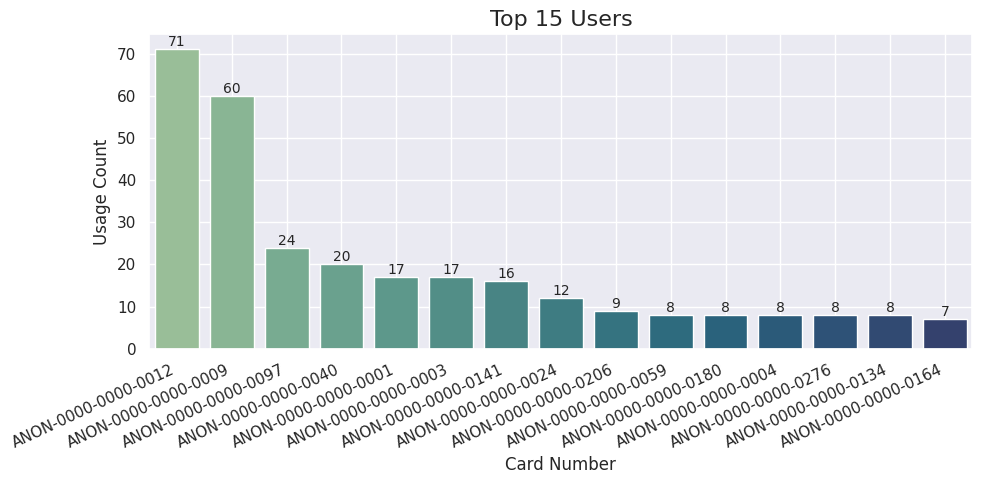

In [58]:
# Top 15 Users
plt.figure(figsize=(10,5))
sns.set_theme()

top_15_cards = data['card'].value_counts().nlargest(15)
ax = sns.barplot(x=top_15_cards.index, y=top_15_cards.values, palette='crest')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Top 15 Users', fontsize=16)
plt.xlabel('Card Number')
plt.ylabel('Usage Count')
plt.xticks(rotation = 25, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

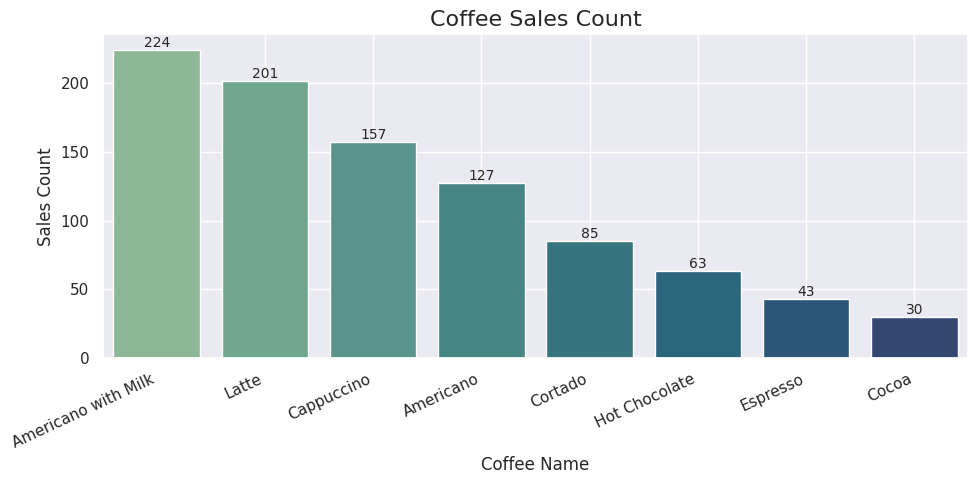

In [59]:
# Coffee Sales Count
plt.figure(figsize=(10,5))
sns.set_theme()

coffee_sales_count = data['coffee_name'].value_counts()
ax = sns.barplot(x=coffee_sales_count.index, y=coffee_sales_count.values, palette='crest')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Coffee Sales Count', fontsize=16)
plt.xlabel('Coffee Name')
plt.ylabel('Sales Count')
plt.xticks(rotation = 25, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

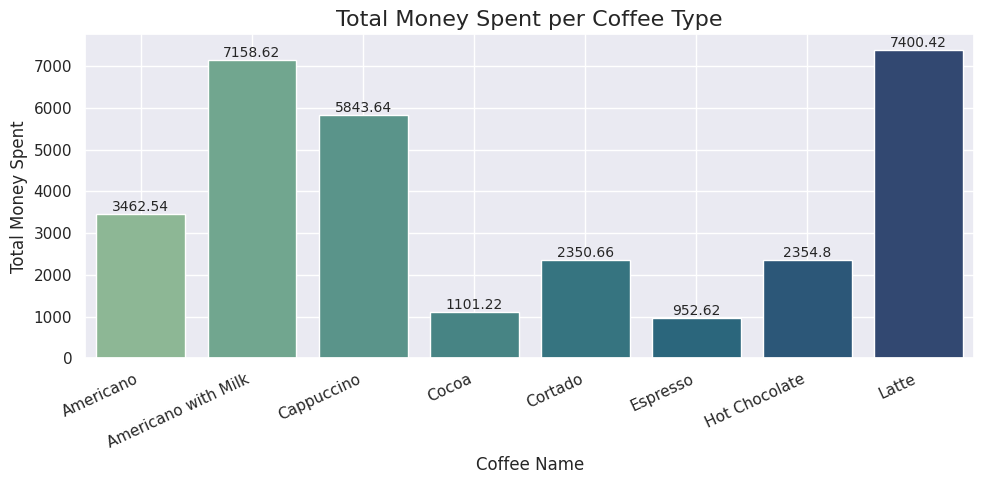

In [63]:
plt.figure(figsize=(10, 5))
sns.set_theme()

money_by_coffee = data.groupby('coffee_name')['money'].sum().reset_index()
ax = sns.barplot(x='coffee_name', y='money', data=money_by_coffee, palette='crest')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Total Money Spent per Coffee Type', fontsize=16)
plt.xlabel('Coffee Name')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

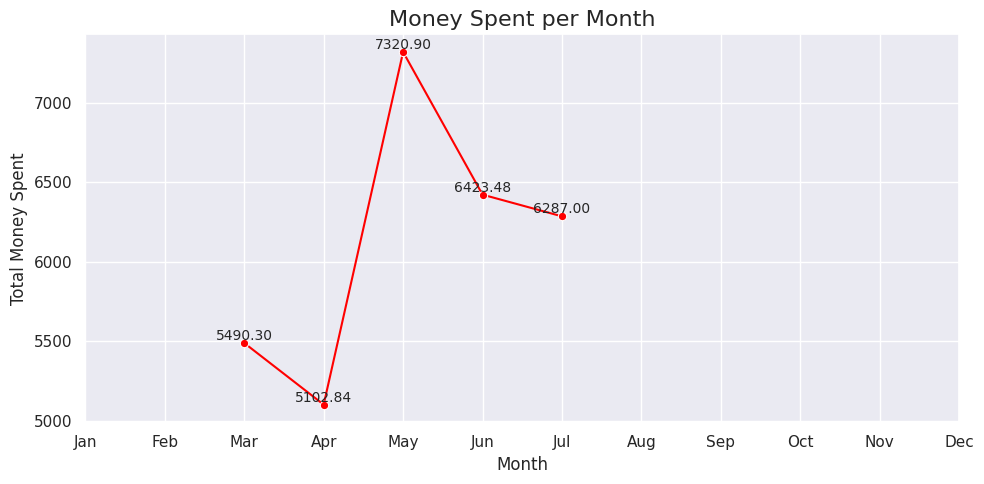

In [79]:
plt.figure(figsize=(10, 5))
sns.set_theme()

money_by_month = data.groupby('month')['money'].sum()
ax = sns.lineplot(x=money_by_month.index, y=money_by_month.values, marker='o', color='red')

# Add labels to each point
for x, y in zip(money_by_month.index, money_by_month.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Money Spent per Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Money Spent')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.grid(True)
plt.show()

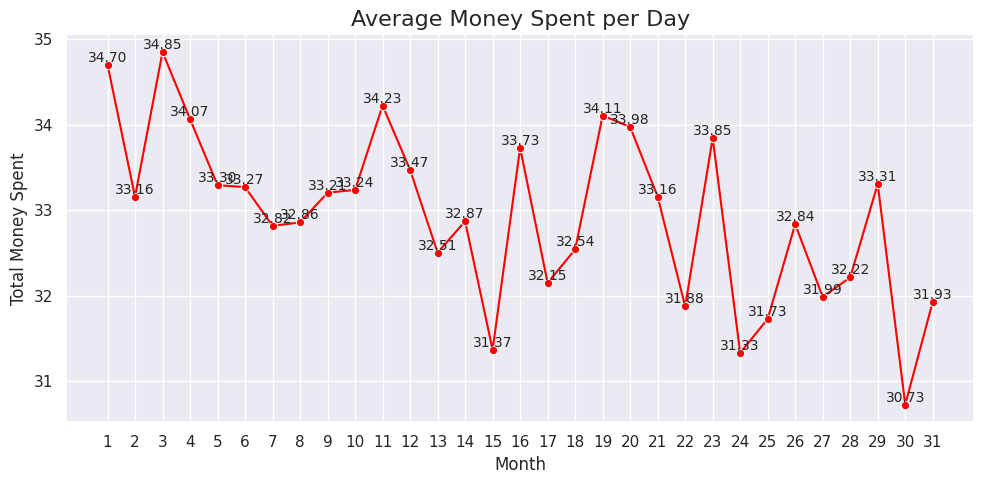

In [85]:
plt.figure(figsize=(10, 5))
sns.set_theme()

money_by_day = data.groupby('day')['money'].mean()
ax = sns.lineplot(x=money_by_day.index, y=money_by_day.values, marker='o', color='red')

# Add labels to each point
for x, y in zip(money_by_day.index, money_by_day.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Average Money Spent per Day', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Money Spent')
plt.xticks(range(1, 32))
plt.tight_layout()
plt.grid(True)
plt.show()

In [96]:
data.head()

,card,money,coffee_name,year,month,day
0,0,38.7,7,2024,3,1
1,1,38.7,6,2024,3,1
3,2,28.9,0,2024,3,1
4,3,38.7,7,2024,3,1
5,4,33.8,1,2024,3,1


In [97]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['card'] = label_encoder.fit_transform(data['card'])
data['coffee_name'] = label_encoder.fit_transform(data['coffee_name'])
data.head()

,card,money,coffee_name,year,month,day
0,0,38.7,7,2024,3,1
1,1,38.7,6,2024,3,1
3,2,28.9,0,2024,3,1
4,3,38.7,7,2024,3,1
5,4,33.8,1,2024,3,1


* Americano: 0
* Americano with Milk: 1
* Cappuccino: 2
* Cocoa: 3
* Cortado: 4
* Espresso: 5
* Hot Chocolate: 6
* Latte: 7

In [98]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=['money'])
y = data['money']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.linear_model import LinearRegression

le = LinearRegression()
le.fit(x_train, y_train)

LinearRegression()

In [120]:
score = le.score(x_test, y_test)
score

0.23726224663550244

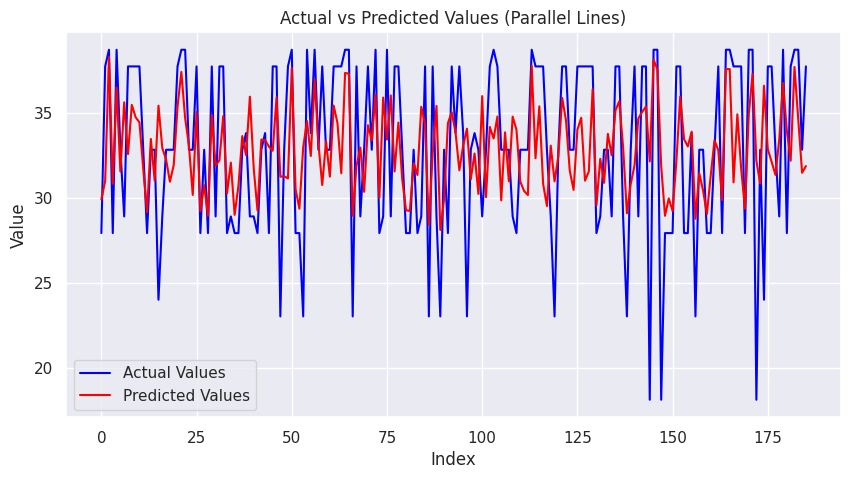

In [121]:
y_pred = le.predict(x_test)

plt.figure(figsize=(10, 5))

# Plot Actual values as a line
sns.lineplot(x=range(len(y_test)), y=y_test,  label='Actual Values', color='blue')

# Plot Predicted values as a line
sns.lineplot(x=range(len(y_pred)), y=y_pred, label='Predicted Values', color='red')

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted Values (Parallel Lines)")
plt.legend()

plt.show()

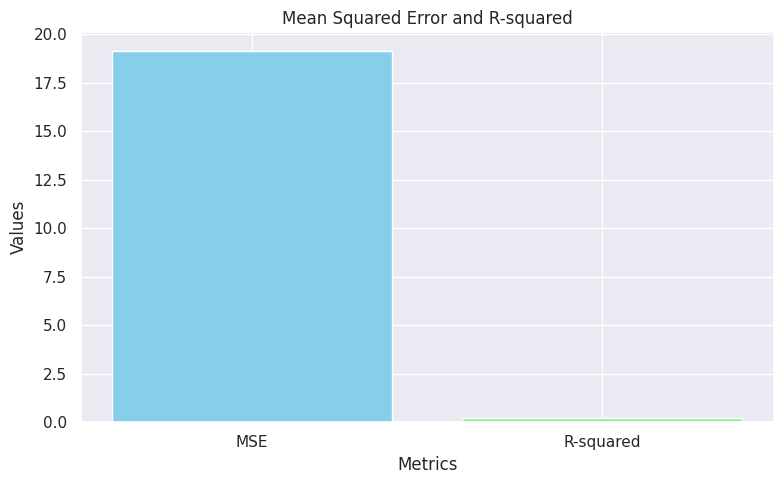

Mean Squared Error: 19.14684527650942
R-squared: 0.23726224663550244


In [119]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Data for the bar plot
metrics = ['MSE', 'R-squared']
values = [mse, r2]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'lightgreen'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Mean Squared Error and R-squared')
plt.tight_layout()

# Show the plot
plt.show()

# Print the values
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")